<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Intro" data-toc-modified-id="Intro-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Intro</a></span></li><li><span><a href="#Logistig-Map" data-toc-modified-id="Logistig-Map-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Logistig Map</a></span></li><li><span><a href="#Ordinary-Differential-Equations-(ODEs)-[TOFIX]" data-toc-modified-id="Ordinary-Differential-Equations-(ODEs)-[TOFIX]-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Ordinary Differential Equations (ODEs) [TOFIX]</a></span></li><li><span><a href="#Partial-Differential-Equations-(PDEs)-[TOFIX]" data-toc-modified-id="Partial-Differential-Equations-(PDEs)-[TOFIX]-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Partial Differential Equations (PDEs) [TOFIX]</a></span></li></ul></div>

# Intro
This notebook explores introductory concepts and examples of **dynamical systems** and simulation of mathematical models for data generation.

Resources:
* Python Interactive Computing and Visualization Cookbook - Second Edition

In [1]:
# Basic libraries import
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import animation
from pathlib import Path
from datetime import datetime
import cv2
from tqdm import tqdm

# Plotting
%matplotlib inline

sns.set_context("paper")
sns.set_style("darkgrid")

# Logistig Map
An example of chaotic system, arising from a simple nonlinear equation. Generally used to model the evolution of a population

In [2]:
def logistic(r: float, x):
    """
    Logistic function
    :param r: logistic coefficient
    :param x: input
    """
    return r * x * (1 - x)

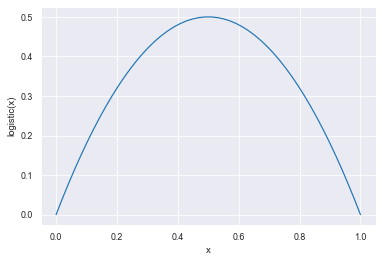

In [3]:
# plost sample graph of the logistic function
r = 2
x = np.linspace(0, 1)
ax = sns.lineplot(x, logistic(r, x))
ax.set(xlabel='x', ylabel='logistic(x)')
plt.show()

In [4]:
def plot_logistic_map(r, x0, n):
    """
    Plot iteration over logistic map
    :param r: logistic coefficient
    :param x: initial input value
    :param n: number of iterations
    """
    # plot logistic function over fixed linespace
    x = np.linspace(0, 1)
    ax = sns.lineplot(x, logistic(r, x))
    
    # iteratively apply logistic from initial value
    # and plot directions
    # (x, x) -> (x, y)
    # (x, y) -> (y, y)
    x = x0
    for i in range(n):
        y = logistic(r, x)
        # Plot the two lines.
        ax.plot([x, x], [x, y], 'k', lw=1)
        ax.plot([x, y], [y, y], 'k', lw=1)
        # Plot the positions with increasing
        # opacity.
        ax.plot([x], [y], 'ok', ms=10, alpha=(i + 1) / n)
        x = y
        
    ax.set_title(f"r={r:.1f}, x_0={x0:.1f}")

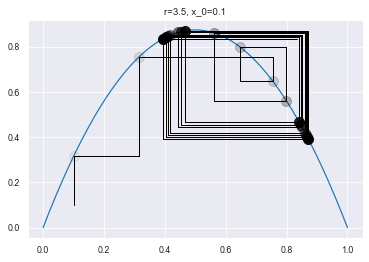

In [5]:
plot_logistic_map(3.5, .1, 20)

In [6]:
def plot_bifurcation_diagram(x0, min_r, max_r, nb_r_vals, nb_iter, nb_last_iter):
    """
    Plot bifurcation diagram by simulating logistic map runs for different coefficient values.
    For each plot results for the last nb_last_iter results
    :param x0: initial input value
    :param min_r: min value for logistic coefficient
    :param max_r: max value for logistic coefficient
    :param nb_r_vals: number of values on which to run the simulation
    :param nb_iter: number of iterations for each logistic run
    :param nb_last_iter: number of last iterations to plot
    """
    # setup plot
    fig, ax = plt.subplots(1, 1, figsize=(4, 4))
    ax.set_xlim(min_r, max_r)
    ax.set_title("Bifurcation diagram")
    
    # range of logistic coefficient values over which we run the simulation
    r = np.linspace(min_r, max_r, nb_r_vals)
    # initial condition (for all simulations)
    x = x0 * np.ones(nb_r_vals)
    
    # run simulation
    for i in range(nb_iter):
        x = logistic(r, x)
        # plot values if last iterations
        if i >= (nb_iter - nb_last_iter):
            ax.plot(r, x, ',k', alpha=.25)

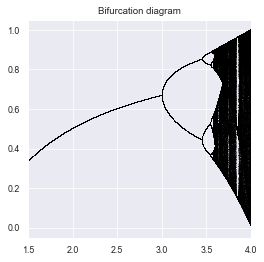

In [7]:
plot_bifurcation_diagram(1e-5, 1.5, 4, 10000, 1000, 100)

# Ordinary Differential Equations (ODEs) [TOFIX]
Function that depends on the derivative of a single independent variable (rate of change of a quantity depends on its value)

In [8]:
import scipy.integrate as spi

In [9]:
# model params
m = 1.   # particle's mass
k = 1.   # drag coefficient
g = 9.81 # gravity accelleration

In [10]:
p0 = (0, 0)  # initial position
v0 = (4, 10) # initial speed vector

In [11]:
# encode everything in single vector to use scipy solver
v0 = np.zeros(4)
v0[2] = 4.
v0[3] = 10.

In [12]:
def derive_velocity(v, t0, k):
    u, udot = v[:2], v[2:]
    # we compute the second derivative of p
    udotdot = -k / m * udot
    udotdot[1] -= g
    
    return np.r_[udot, udotdot]

In [13]:
def plot_system_simulation():
    fig, ax = plt.subplots(1, 1, figsize=(8, 4))
    
    # simulate system on 30 linearly spaced times between t=0 and t=3.
    t = np.linspace(0., 3., 30)
    
    # We simulate the system for different values of k.
    for k in np.linspace(0., 1., 5):
        # We simulate the system and evaluate $v$ on the
        # given times.
        v = spi.odeint(derive_velocity, v0, t, args=(k,))
        # We plot the particle's trajectory.
        ax.plot(v[:, 0], v[:, 1], 'o-', mew=1, ms=8, mec='w', label=f'k={k:.1f}')
    ax.legend()
    ax.set_xlim(0, 12)
    ax.set_ylim(0, 6)

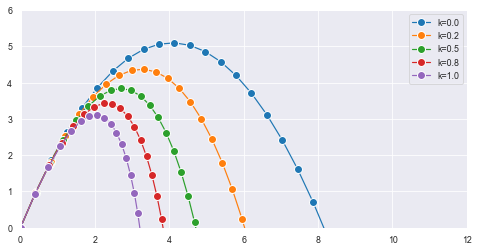

In [14]:
plot_system_simulation()

# Partial Differential Equations (PDEs) [TOFIX]
Dynamical systems involving both time and space. Hard to solve analytically, rely on numerical simulations.